## Missing Data: 
 - missing completely at Random, MCRA: The likelihood of a value being missing is the same for all observations. 
 - Missing at random, MAR: the probability of an observation being missing depends on available information, then the observation is missing at random. 
 - missing not at random, MNRA: like people failed to fill out a depression survey because of their depression. Data missing due to some reason.  

In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [8]:
df = pd.read_csv('/Users/zichenfan/Documents/MachineLearning_project/Dateset_featureEngineering/titanic.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [9]:
#checking missing values
df.isna().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [10]:
#percentage of missing values
df.isna().mean()

pclass       0.000000
survived     0.000000
name         0.000000
sex          0.000000
age          0.200917
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.000764
cabin        0.774637
embarked     0.001528
boat         0.628724
body         0.907563
home.dest    0.430863
dtype: float64

77% of the data missing in the variable Cabin, in which the passenger were traveling.

## Missing data not at Random

when the person not survived, their age or cabin probably remains unknown. So, we can consider by looking into the survived and non-survived categories.

In [11]:
df['cabin'].isnull().groupby(df['survived']).mean()

survived
0    0.873918
1    0.614000
Name: cabin, dtype: float64

In [12]:
df['cabin_null'] = np.where(df['cabin'].isnull(), 1, 0)

In [13]:
df.groupby(['survived'])['cabin_null'].mean()

survived
0    0.873918
1    0.614000
Name: cabin_null, dtype: float64

the percentage of missing values is higher for those who did not survive. 

## Missing data completely at Random

In [14]:
df[df['embarked'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,cabin_null
168,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,6,NaN,NaN,0
284,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,6,NaN,"Cincinatti, OH",0


## Cardinality 
High cardinality :
- variables with too many labels tend to dominate those with only a few labels, particularly in **desicion tree-based** algorithms. 
- High cardinality may introduce noise. 
- some of the labels may only be present in the training data set and not in the test set, so machine learning algorithms may over fit to the training set. 
- some labels may appear only in the test set, leaving the machine learning algorithms unable to perform a calculation over the new observation. 

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split 

In [16]:
type(df)

pandas.core.frame.DataFrame

In [17]:
# check chategorical data 
print('Number of categories in the variable Name: {}'. format(len(df.name.unique()))) 
print('Number of categories in the variable sex: {}'. format(len(df.sex.unique())))
print('Number of categories in the variable cabin: {}'. format(len(df.cabin.unique())))
print('Number of categories in the variable ticket: {}'. format(len(df.ticket.unique())))
print('Number of categories in the variable embarked: {}'. format(len(df.embarked.unique())))
print('total number of passengers: {}'. format(len(df)))

Number of categories in the variable Name: 1307
Number of categories in the variable sex: 2
Number of categories in the variable cabin: 182
Number of categories in the variable ticket: 929
Number of categories in the variable embarked: 4
total number of passengers: 1309


In [18]:
df.cabin.unique()

array(['B5', 'C22', 'E12', 'D7', 'A36', 'C101', nan, 'C62', 'B35', 'A23',
       'B58', 'D15', 'C6', 'D35', 'C148', 'C97', 'B49', 'C99', 'C52', 'T',
       'A31', 'C7', 'C103', 'D22', 'E33', 'A21', 'B10', 'B4', 'E40',
       'B38', 'E24', 'B51', 'B96', 'C46', 'E31', 'E8', 'B61', 'B77', 'A9',
       'C89', 'A14', 'E58', 'E49', 'E52', 'E45', 'B22', 'B26', 'C85',
       'E17', 'B71', 'B20', 'A34', 'C86', 'A16', 'A20', 'A18', 'C54',
       'C45', 'D20', 'A29', 'C95', 'E25', 'C111', 'C23', 'E36', 'D34',
       'D40', 'B39', 'B41', 'B102', 'C123', 'E63', 'C130', 'B86', 'C92',
       'A5', 'C51', 'B42', 'C91', 'C125', 'D10', 'B82', 'E50', 'D33',
       'C83', 'B94', 'D49', 'D45', 'B69', 'B11', 'E46', 'C39', 'B18',
       'D11', 'C93', 'B28', 'C49', 'B52', 'E60', 'C132', 'B37', 'D21',
       'D19', 'C124', 'D17', 'B101', 'D28', 'D6', 'D9', 'B80', 'C106',
       'B79', 'C47', 'D30', 'C90', 'E38', 'C78', 'C30', 'C118', 'D36',
       'D48', 'D47', 'C105', 'B36', 'B30', 'D43', 'B24', 'C2', 'C65',


In [19]:
df['cabin_reduced'] = df['cabin'].astype(str).str[0]

df[['cabin','cabin_reduced']].head()

,cabin,cabin_reduced
0,B5,B
1,C22,C
2,C22,C
3,C22,C
4,C22,C


In [20]:
len(df.cabin_reduced.unique())

9

we reduced the category from 182 to 9 

In [21]:
use_cols = ['cabin', 'cabin_reduced', 'sex']

X_train, X_test, y_train, y_test = train_test_split(
    df[use_cols],
    df['survived'],
    test_size = 0.3,
    random_state = 0
)

X_train.shape, X_test.shape

((916, 3), (393, 3))

## Uneven distribution of categories

when a variable is highly cardinal, some categories appear only on the training set, and other only on the testing set. If present only in the training set, they may cause over-fitting. If only present in the test dataset, then the model doesn't know how to predict it as it didn't appear in training set. 

In [22]:
#labels present only in the training set: 
unique_to_train_set = [
    x for x in X_train.cabin.unique() if x not in X_test.cabin.unique()
]
len(unique_to_train_set)

113

In [23]:
unique_to_test_set = [
    x for x in X_test.cabin.unique() if x not in X_train.cabin.unique()
]
len(unique_to_test_set)

36

this problem can be mitigated by reducing the cardinality of the variable. 

In [24]:
unique_to_train = [
    x for x in X_train.cabin_reduced.unique() if x not in X_test.cabin_reduced.unique()
]
len(unique_to_train)

1

In [25]:
unique_to_test=[
    x for x in X_test.cabin_reduced.unique() if x not in X_train.cabin_reduced.unique()
]
len(unique_to_test)

0

In [26]:
# re-map the categorical variable sex into numbers.
X_train.loc[:,'sex'] = X_train.loc[:, 'sex'].map({'male':0, 'female':1})
X_test.loc[:,'sex'] = X_test.loc[:, 'sex'].map({'male': 0, 'female':1})
X_train.sex.head()

501     1
588     1
402     1
1193    0
686     1
Name: sex, dtype: int64

## Rare-labels Is label frequency a problem?


Rare values can add a lot of information or none at all. For example, consider a stockholder meeting where each person can vote in proportion to their number of shares. One of the shareholders owns 50% of the stock, and the other 999 shareholders own the remaining 50%. The outcome of the vote is largely influenced by the shareholder who holds the majority of the stock. The remaining shareholders may have an impact collectively, but they have almost no impact individually.

The same occurs in real-life datasets. The label that is over-represented in the dataset tends to dominate the outcome, and those that are under-represented may have no impact individually, but could have an impact collectively.

More specifically,

- Rare categories can cause over-fitting, particularly in tree-based methods.

- Infrequent labels may add noise, which could cause over-fitting.

- Rare labels may be present only in training set, therefore causing over-fitting.

- Rare labels may appear only in the test set. Thus, the ML model will not know how to evaluate it.

Note Sometimes rare values, are indeed important. For example, if we are building a model to predict fraudulent loan applications, which are by nature rare, then a rare value in a certain variable, may be indeed very predictive. This rare value could be telling us that the observation is most likely a fraudulent application, and therefore we should not to ignore it.

In [27]:
# Variable definitions:

# Neighborhood: Physical locations within Ames city limits
# Exterior1st: Exterior covering on house
# Exterior2nd: Exterior covering on house (if more than one material)

use_cols = ['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice']

data = pd.read_csv('/Users/zichenfan/Documents/MachineLearning_project/Dateset_featureEngineering/houseprice.csv', usecols=use_cols)

data.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,Veenker,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,Crawfor,Wd Sdng,Wd Shng,140000
4,NoRidge,VinylSd,VinylSd,250000


In [28]:
#count categorical variables 
cat_cols = ['Neighborhood', 'Exterior1st', 'Exterior2nd']

for col in cat_cols:
    print('variable:', col, 'number of labels:', data[col].nunique())

print('total hourses:', len(data))


variable: Neighborhood number of labels: 25
variable: Exterior1st number of labels: 15
variable: Exterior2nd number of labels: 16
total hourses: 1460


#### Category frequency 

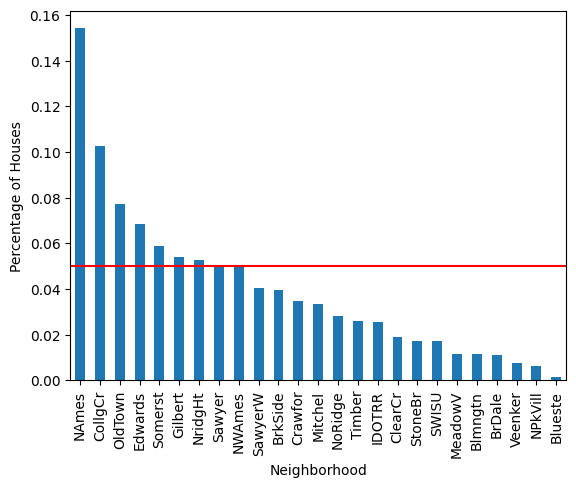

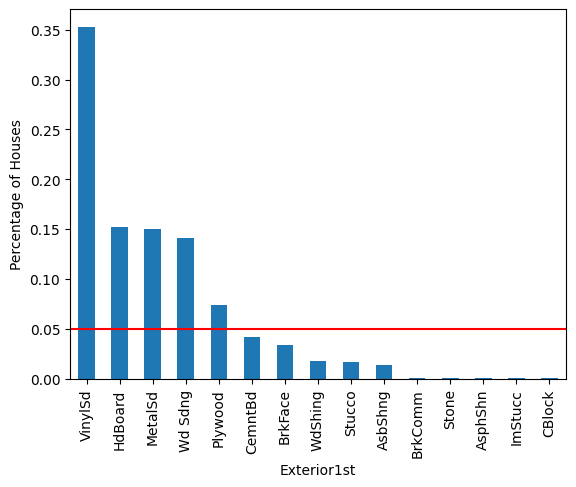

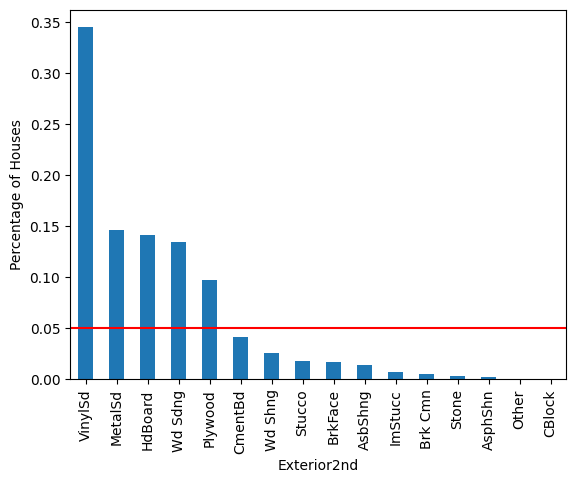

In [29]:
total_houses = len(data)

for col in cat_cols:
    temp_df = pd.Series(data[col].value_counts()/total_houses)

    fig = temp_df.sort_values(ascending = False).plot.bar()
    fig.set_xlabel(col)

    # add a line at 5% to flag the threshhold for rare categories. 
    fig.axhline(y = 0.05, color = 'red')
    fig.set_ylabel('Percentage of Houses')
    plt.show()

#### Mean sale price in rare labels

In [30]:
# 1. caculte the percentage of houses per category 
# 2. the mean saleprice per category 

def calculate_mean_price(df, var):
    total_houses = len(df)

    temp_df = pd.Series(df[var].value_counts()/total_houses).reset_index()
    temp_df.columns = [var, 'perc_houses']

    avg_price = round(df.groupby(var)['SalePrice'].mean(),0).reset_index()
    avg_price.columns = [var, 'avg_price']

    temp_df = temp_df.merge(avg_price, on = var)

    return temp_df

In [31]:
temp_df = calculate_mean_price(data, 'Neighborhood')
temp_df

,Neighborhood,perc_houses,avg_price
0,NAmes,0.154110,145847.0
1,CollgCr,0.102740,197966.0
2,OldTown,0.077397,128225.0
3,Edwards,0.068493,128220.0
4,Somerst,0.058904,225380.0
5,Gilbert,0.054110,192855.0
6,NridgHt,0.052740,316271.0
7,Sawyer,0.050685,136793.0
8,NWAmes,0.050000,189050.0
9,SawyerW,0.040411,186556.0


In [32]:
#plot the category frequency and mean saleprice 
def plot_category(df, var):
    fig, ax = plt.subplots(figsize = (8, 4))
    plt.xticks(df.index, df[var], rotation = 90)

    ax2 = ax.twinx()
    ax.bar(df.index, df['perc_houses'], color = 'lightgrey')
    ax2.plot(df.index, df['avg_price'], color = 'green', label = 'Seconds')
    ax.axhline(y = 0.05, color = 'red')
    ax.set_ylabel('percentage of houses per category')
    ax.set_xlabel(var)
    ax2.set_ylabel('Average price per category')
    plt.show()

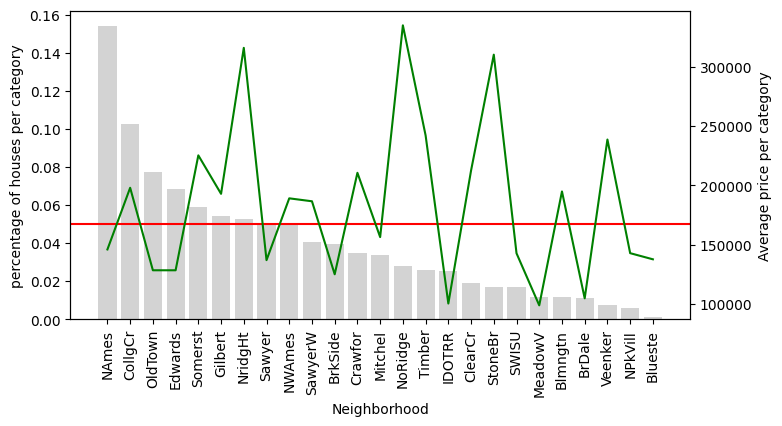

In [33]:
plot_category(temp_df, 'Neighborhood')

NoRidge has the higest avg house price, and Meadow has the lowest price

House price in StoneBr surges to almost 300k, but it has less 5% of the houses. 

why is this important? If we only have information for few hourses, we could be under or over-estimating the effect of stoneBr on the saleprice. 
how confident can we be to conclude that most hourse in StoneBe cost around 300k, when we only have a few houses to learn from?

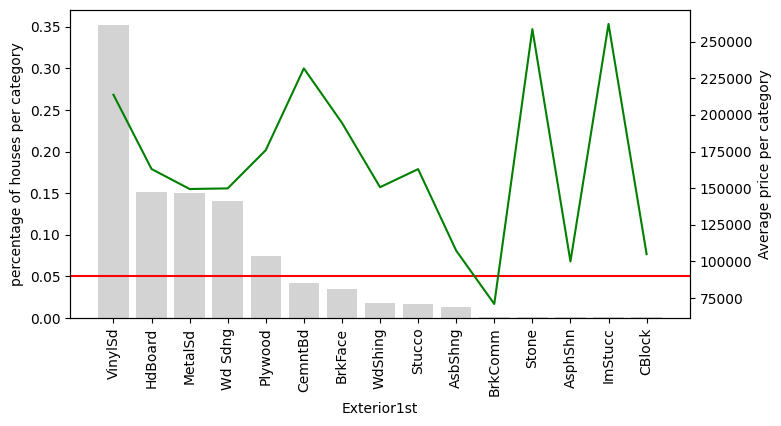

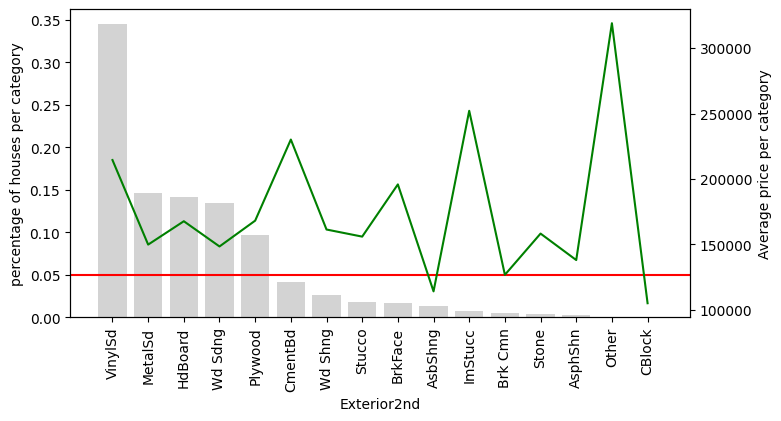

In [34]:

for col in cat_cols:
    if col != 'Neighborhood':
        temp_df = calculate_mean_price(data, col)
        plot_category(temp_df, col)
        

An important takeaway here is the rare categories shows higher average housing price. These rare labels could indeed be very predictive, or introducing noise than information. And because the labers are under-represented, we can't be sure whether they have a true impact on the house price as we only have information from few labels. 

A solution to solve this issue is to group rare labels. 

### Grouping rare labels

a common way of handling rare values is to group them under an umbrella category called 'Rare' or 'Other'. 

In [35]:
#setting 5% as the threshold
def group_rare_labels(df, var):
    total_houses = len(df)
    #calculate percentage of houses per category
    temp_df = pd.Series(df[var].value_counts()/total_houses)

    #create dictionary to replace the rare labels with the string 'other' for category that less than 5% 
    group_dict = {
        k:('other' if k not in temp_df[temp_df>=0.05].index else k)
        for k in temp_df.index
    }
    #other way to do it
    #temp = df[var].apply(lambda x: x if category_percentages[x] >= 0.05 else 'other')
    #return temp

    temp = df[var].map(group_dict)
    return temp 

In [38]:
data['Neighborhood_group'] = group_rare_labels(data, 'Neighborhood')
data.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice,Neighborhood_group
0,CollgCr,VinylSd,VinylSd,208500,CollgCr
1,Veenker,MetalSd,MetalSd,181500,other
2,CollgCr,VinylSd,VinylSd,223500,CollgCr
3,Crawfor,Wd Sdng,Wd Shng,140000,other
4,NoRidge,VinylSd,VinylSd,250000,other


In [44]:
data['Neighborhood_group'].unique()

array(['CollgCr', 'other', 'Somerst', 'NWAmes', 'OldTown', 'Sawyer',
       'NridgHt', 'NAmes', 'Edwards', 'Gilbert'], dtype=object)

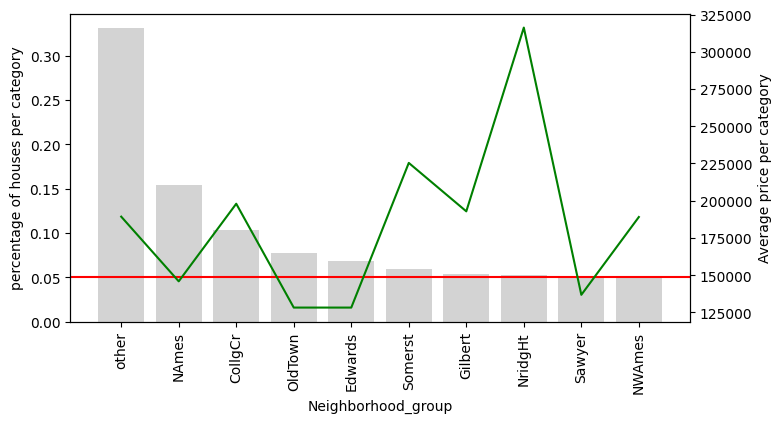

In [45]:
temp_df = calculate_mean_price(data, 'Neighborhood_group')
plot_category(temp_df, 'Neighborhood_group')

Now, the 'other' group which is the rare group contains the overall influence of all the infrequent categories on the sale price. 

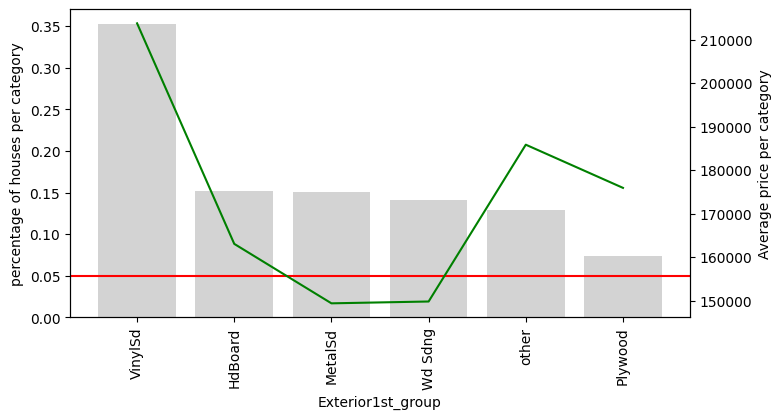

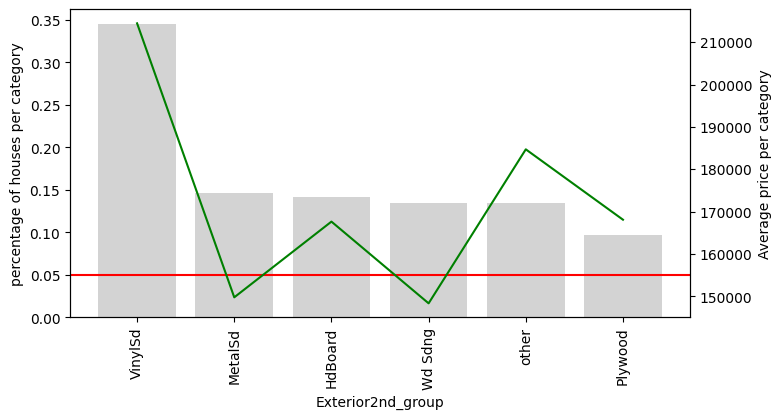

In [46]:
for col in cat_cols[1:]:
    data[col+'_group'] = group_rare_labels(data, col)
    temp_df = calculate_mean_price(data, col+'_group')
    plot_category(temp_df, col+'_group')

In [48]:
list = ["neighborhood", "house_style", "roof_type", "exterior"]

for i in list[1:]: 
    print(i)

house_style
roof_type
exterior


for both exterior1st and exterior2nd, other groups show a higher average price than other groups except for Vinylsd. 

Standard deviation or inter-quantile range would give a better idea of how the categories affect the house price. 

### Uneven distribution between train and test sets

In [49]:
X_train, X_test, y_train, y_test = train_test_split(data[cat_cols], 
                                                    data['SalePrice'],
                                                    test_size = 0.3,
                                                    random_state=2910)

X_train.shape, X_test.shape

((1022, 3), (438, 3))

In [51]:
unique_to_train = [
    x for x in X_train['Exterior1st'].unique() if x not in X_test['Exterior1st'].unique()
]
print(unique_to_train)

['Stone', 'BrkComm', 'ImStucc', 'CBlock']


In [52]:
unique_to_test = [
    x for x in X_test['Exterior1st'].unique() if x not in X_train['Exterior1st'].unique()
]
print(unique_to_test)

['AsphShn']


From above, there are 4 labels in the train set that are not in the test set, and one label in the test that doesn't in the train set. 

## Outliers

some ML models are sensitive to outliers. For instance, **AdaBoost** may treat outliers as "hard" cases and out tremendous witghts on them, thus producing a model with poor generation. 

**Linear models**, can be sensitive to outliers. 

**Decision tree-based** models are robust to outliers. Decision trees make decisions by asking if variable X is >= than a certain value, and therefore the ourlier will fall on each side of the equation, but it will be treated similarly to non-outlier values. 



#### Identifing Outliers 